#### Thay thế bằng giá trị ngẫu nhiên

-  Kỹ thuật này cũng giả định rằng dữ liệu trống hoàn toàn ngẫu nhiên
- Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột tương ứng


In [191]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [192]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [193]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [194]:
df['Age'].isnull().sum()

177

In [195]:
# lay ngau nhien tu cot Age mot gia trị khac NaN, 
# ket qua se ko lap lai sau moi lan thuc hien lenh 
df['Age'].dropna().sample()

625    61.0
Name: Age, dtype: float64

In [196]:
# lay ngau nhien tu cot Age n gia trị khac NaN
# lap lai ket qua sau moi lan thuc hien lenh
random_samples = df['Age'].dropna().sample(n=df['Age'].isnull().sum(),random_state=0)
random_samples

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [197]:
# chi so cua cac khach hang bi trong du lieu Age
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [198]:
# gan lai index cho series ngau nhien vua tao
random_samples.index = df[df['Age'].isnull()].index

In [199]:
# Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột
df['Age_random']=df['Age']
df.loc[df['Age'].isnull(), 'Age_random']=random_samples
df.tail()

,Survived,Age,Fare,Age_random
886,0,27.0,13.00,27.0
887,1,19.0,30.00,19.0
888,0,NaN,23.45,15.0
889,1,26.0,30.00,26.0
890,0,32.0,7.75,32.0


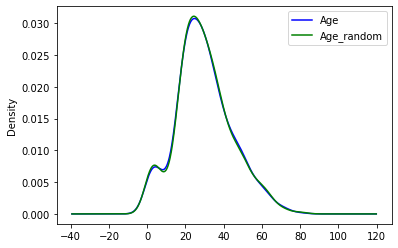

In [200]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='blue')
df['Age_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Ưu điểm:
- Dễ thực hiện 
- Phương sai của dữ liệu ít bị biến đổi

Nhược điểm:
- Không phải lúc nào cũng có tác dụng
